# Classifier Model - TF-IDF Feature Vector

In [118]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

%matplotlib inline

In [125]:
def get_data(data_file_path):
    excel_file_obj = pd.ExcelFile(data_file_path)
    # print(excel_file_obj.sheet_names)
    # get all endpoints
    endpoint_df = excel_file_obj.parse("EPs ")
    endpoints = endpoint_df.loc[:, "Short Name"]
    frames = []
    for endpoint in endpoints:
        df = excel_file_obj.parse(endpoint+" PT")
        frames.append(df.loc[:,['Endpoint', 'MedDRA Preferred Term (PT)']])
    return pd.concat(frames)

def print_stats(df):
    print(f"No of rows in the dataset:{df.shape}")

data_file_path_2020 = os.path.join("data","Master List of Preferred Term v21 2020_03_19.xlsx")
data_file_path_2019 = os.path.join("data","Master List of Preferred Term v20 2019-10-23.xlsx")

df1 = get_data(data_file_path_2019)
df2 = get_data(data_file_path_2020)

print_stats(df1)
print_stats(df2)

No of rows in the dataset:(1396, 2)
No of rows in the dataset:(1409, 2)


In [128]:
frames = [df1, df2]
df = pd.concat(frames)
print_stats(df)

No of rows in the dataset:(2805, 2)


## Exploratory Data Analysis

In [129]:
print(df.columns)

Index(['Endpoint', 'MedDRA Preferred Term (PT)'], dtype='object')


In [87]:
df.groupby('MedDRA Preferred Term (PT)')["Endpoint"].count().sort_values(ascending=False)

MedDRA Preferred Term (PT)
Vascular operation                     10
Vascular stent occlusion               10
Vascular graft                         10
Thrombectomy                           10
Thromboembolectomy                     10
                                       ..
Ischaemic limb pain                     0
Complication associated with device     0
Hanging                                 0
Completed suicide                       0
Euthanasia                              0
Name: Endpoint, Length: 1001, dtype: int64

### Number of rows with end points greater than 1

In [131]:
df.groupby(['MedDRA Preferred Term (PT)']).filter(lambda x: x['Endpoint'].count()>1).shape

(2798, 2)

Text(0.5, 0, 'number of endpoints')

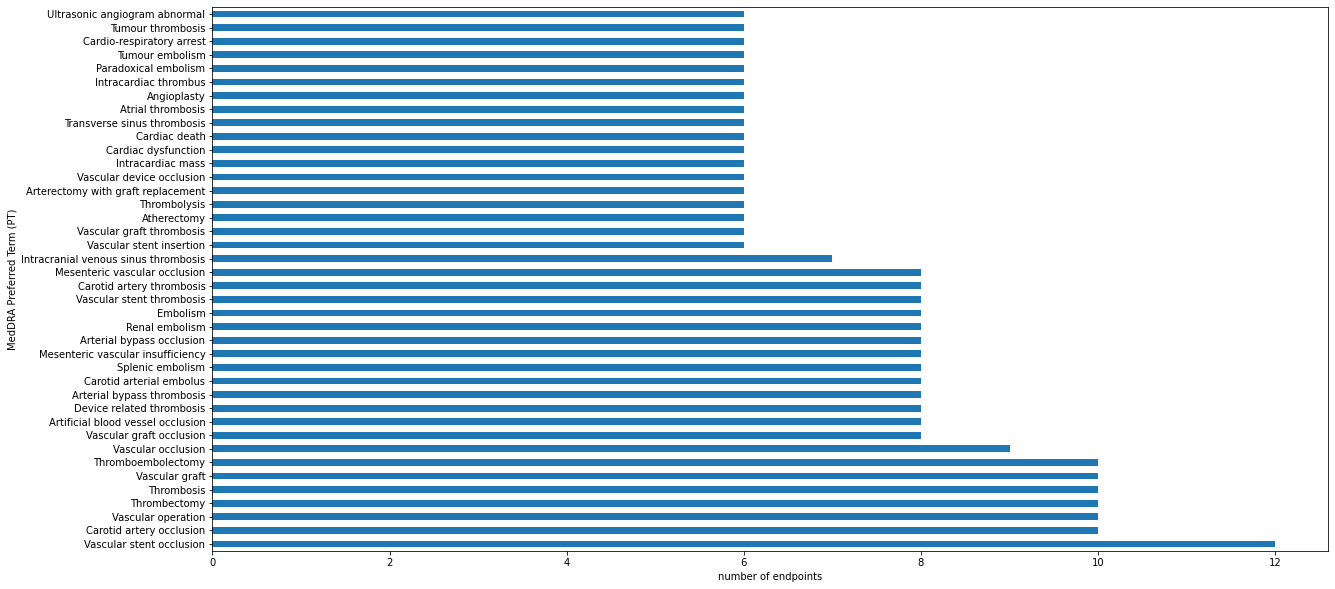

In [154]:
ax = df.groupby('MedDRA Preferred Term (PT)').filter(lambda x: x['Endpoint'].count()>1).groupby('MedDRA Preferred Term (PT)')["Endpoint"].count().sort_values(ascending=False)[:40].plot(kind="barh",figsize=(20,10))
ax.set_xlabel("number of endpoints")



In [155]:
df[df['MedDRA Preferred Term (PT)'].str.contains('Vascular stent occlusion')]


,Endpoint,MedDRA Preferred Term (PT)
247,Arterial Thromboembolic (ATE) Event,Vascular stent occlusion
219,Cerebrovascular Event,Vascular stent occlusion
86,Cardiac Ischemic Event,Vascular stent occlusion
88,Deep Vein Thrombosis (DVT) Event,Vascular stent occlusion
6,Coronary Stent Thrombosis,Vascular stent occlusion
94,Venous/Pulmonary Artery Thromboembolic Event,Vascular stent occlusion
250,Arterial Thromboembolic (ATE) Event,Vascular stent occlusion
225,Cerebrovascular Event,Vascular stent occlusion
87,Cardiac Ischemic Event,Vascular stent occlusion
88,Deep Vein Thrombosis (DVT) Event,Vascular stent occlusion


In [134]:
df['Endpoint'].unique()

array(['Serious Arrhythmias', 'Serious Arrhythmia ', 'Serious Arrhythmia',
       'Arterial Thromboembolic (ATE) Event', 'Cerebrovascular Event',
       'Cardiogenic Shock', 'Cardiac Ischemic Event',
       'Coronary Revascularization', 'Death',
       'Deep Vein Thrombosis (DVT) Event',
       'Hospitalization for Heart Failure', 'Hosp for Hypertension',
       'Other Arterial Event', 'Peripheral Arterial Event',
       'Pancreatitis', 'Peripheral Revascularization',
       'Resuscitated Sudden Death', 'Coronary Stent Thrombosis',
       'Syncope', 'Venous/Pulmonary Artery Thromboembolic Event',
       'Arterial Thromboembolic (ATE) Event ', 'Cerebrovascular Event '],
      dtype=object)

In [7]:
## Preprocessing (not sure if this is required) - removing punctuation, removing stopwords, conversion to lowercase, stemming (reduce the number of inflectional form of words appearing in the text) 

import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import re

stemmer = PorterStemmer()
words = stopwords.words("english")

df['Processed-MedDRA Preferred Term (PT)'] = df['MedDRA Preferred Term (PT)'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\c299342\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
## Split the data

In [13]:
label = df["Endpoint"]
split_percent = 0.05
X_train, X_test, y_train, y_test = train_test_split(df['Processed-MedDRA Preferred Term (PT)'], label, test_size=split_percent, random_state = 100)

print(X_train.shape, X_test.shape)

(1109,) (59,)


0                                Serious Arrhythmias
1                                Serious Arrhythmias
2                                Serious Arrhythmias
3                                Serious Arrhythmias
4                                Serious Arrhythmias
                            ...                     
1163    Venous/Pulmonary Artery Thromboembolic Event
1164    Venous/Pulmonary Artery Thromboembolic Event
1165    Venous/Pulmonary Artery Thromboembolic Event
1166    Venous/Pulmonary Artery Thromboembolic Event
1167    Venous/Pulmonary Artery Thromboembolic Event
Name: Endpoint, Length: 1168, dtype: object